# Various simulations related to the signature and the randomized signature

### Mechanism for Brownian Motion

In [54]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [2]:
class Brownian():
    """
    A Brownian motion class constructor
    """
    def __init__(self,x0=0):
        """
        Init class
        """
        assert (type(x0)==float or type(x0)==int or x0 is None), "Expect a float or None for the initial value"
        
        self.x0 = float(x0)
    
    def gen_random_walk(self,n_step=100):
        """
        Generate motion by random walk
        
        Arguments:
            n_step: Number of steps
            
        Returns:
            A NumPy array with `n_steps` points
        """
        # Warning about the small number of steps
        if n_step < 30:
            print("WARNING! The number of steps is small. It may not generate a good stochastic process sequence!")
        
        w = np.ones(n_step)*self.x0
        
        for i in range(1,n_step):
            # Sampling from the Normal distribution with probability 1/2
            yi = np.random.choice([1,-1])
            # Weiner process
            w[i] = w[i-1]+(yi/np.sqrt(n_step))
        
        return w
    
    def gen_normal(self,n_step=100):
        """
        Generate motion by drawing from the Normal distribution
        
        Arguments:
            n_step: Number of steps
            
        Returns:
            A NumPy array with `n_steps` points
        """
        if n_step < 30:
            print("WARNING! The number of steps is small. It may not generate a good stochastic process sequence!")
        
        w = np.ones(n_step)*self.x0
        
        for i in range(1,n_step):
            # Sampling from the Normal distribution
            yi = np.random.normal()
            # Weiner process
            w[i] = w[i-1]+(yi/np.sqrt(n_step))
        
        return w

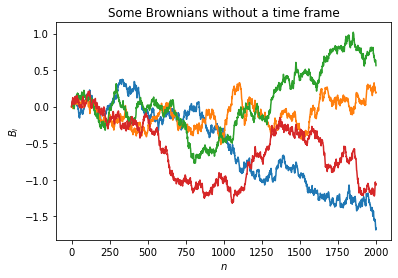

In [3]:
b = Brownian()
for i in range(4):
    plt.plot(1*b.gen_normal(2000))

plt.title("Some Brownians without a time frame")
plt.xlabel("$n$")
plt.ylabel("$B_i$")
plt.show()

### Mechanism for random matrices and vectors

In [4]:
A = np.random.normal(0, 1, size=(3, 2, 4))
v = np.random.normal(0, 1, size=(3))

In [5]:
A, v

(array([[[-2.04290122,  0.94935603, -1.20216336,  0.23887383],
         [ 0.28053751, -0.7419436 , -0.34146901, -2.04632439]],
 
        [[-0.81423881,  1.07821163, -0.76538773, -0.11934166],
         [ 0.97166737,  1.72909205, -1.01404664, -0.03944624]],
 
        [[ 0.1909623 , -0.09267461,  0.93463105,  0.32843277],
         [ 0.84232094,  0.07568918,  0.5522696 ,  0.34522681]]]),
 array([ 2.22586355,  0.6873979 , -1.87452945]))

### Time&step structure

In [6]:
N = 101
T = 1
step = T/N
x_axis = np.linspace(0, T, N)

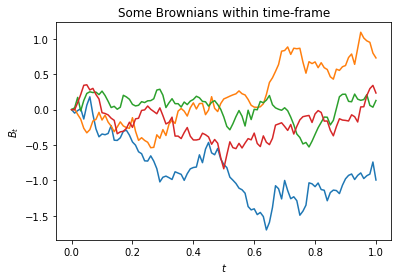

In [7]:
for i in range(4):
    plt.plot(x_axis, b.gen_normal(101))
plt.title("Some Brownians within time-frame")
plt.xlabel("$t$")
plt.ylabel("$B_t$")
plt.show()

## 1-Dimensional Stochastic Double Well

### Constructing the process

In [8]:
b = Brownian()

theta, mu, sigma, y0 = 1, 2, 1, 1
Y = np.zeros(N)
Y[0] = y0
brow = b.gen_normal(N+1)
db =  np.diff(brow)

In [9]:
for i in range(N-1):
    Y[i+1] = Y[i] + theta * Y[i] * (mu - Y[i]*Y[i]) * step + sigma * db[i]

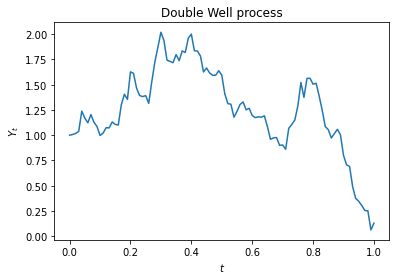

In [10]:
plt.plot(x_axis, Y)
plt.title("Double Well process")
plt.xlabel("$t$")
plt.ylabel("$Y_t$")
plt.show()

### Constructing the randomized signature

In [11]:
k = 10
A = np.random.normal(0, 1, size=(k, k))
b = np.random.normal(0, 1, size=k)
dY = np.diff(Y)
Z = np.zeros((N, k))
Z[0][0] = 1

In [12]:
for i in range(N-1):
    Z[i+1] = Z[i] + (A@Z[i] + b)*dY[i]

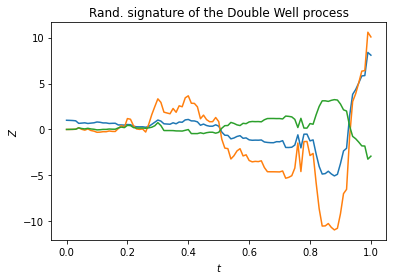

In [35]:
for i in range(3):
    plt.plot(x_axis, Z[:,i])

plt.title("Rand. signature of the Double Well process")
plt.xlabel("$t$")
plt.ylabel("$Z$")
plt.show()

In [14]:
Z[100]

array([  8.08149151,  10.0682935 ,  -2.90577588,  -2.35379662,
        14.10367846,  20.16594761,   3.88948915, -22.15002709,
       -11.10472915,   2.25675089])

### Training the linear, time-homogeneous readout - without regularization

In [15]:
model1 = LinearRegression().fit(Z, Y)

In [16]:
r_sq_1 = model1.score(Z, Y)
print(f"coefficient of determination: {r_sq_1}")

coefficient of determination: 0.9999999905509257


In [17]:
print(f"intercept: {model1.intercept_}")

intercept: 0.6863617146511591


In [18]:
print(f"coefficients: {model1.coef_}")

coefficients: [ 0.31366836 -1.62815849 -0.04239402  0.39579693  1.09472577 -0.57828665
  1.29847408 -0.68638032  0.89979682  0.03110111]


In [19]:
Y_pred_1 = model1.predict(Z)

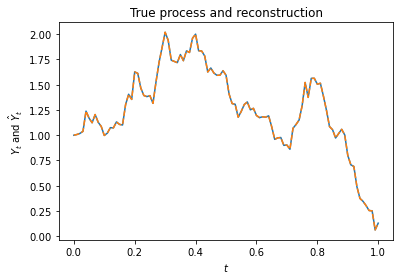

In [20]:
plt.plot(x_axis, Y)
plt.plot(x_axis, Y_pred_1, '--')
plt.title("True process and reconstruction")
plt.xlabel("$t$")
plt.ylabel("$Y_t$ and $\hat{Y}_t$")
plt.show()

### Training the linear, time-homogeneous readout - with regularization

In [67]:
model2 = Lasso(alpha=0.10)
model2.fit(Z, Y)

Lasso(alpha=0.1)

In [68]:
r_sq_2 = model2.score(Z, Y)
print(f"coefficient of determination: {r_sq_2}")

coefficient of determination: 0.7136893207878918


In [69]:
print(f"intercept: {model2.intercept_}")

intercept: 1.273906328306644


In [70]:
print(f"coefficients: {model2.coef_}")

coefficients: [-0.          0.          0.          0.          0.04722751 -0.
  0.          0.05457964  0.         -0.04073029]


In [71]:
Y_pred_2 = model2.predict(Z)

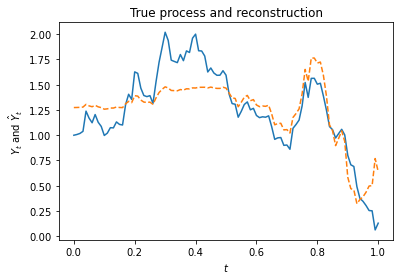

In [72]:
plt.plot(x_axis, Y)
plt.plot(x_axis, Y_pred_2, '--')
plt.title("True process and reconstruction")
plt.xlabel("$t$")
plt.ylabel("$Y_t$ and $\hat{Y}_t$")
plt.show()

## 4-Dimensional Ornstein–Uhlenbeck process

### Constructing the process

In [27]:
y0_4, mu_4 = np.array([1,1,1,1]), np.array([1,1,1,1])
sigma_4 = np.array([[1,0,0,0], [0,1,0,0], [0,0,1,0], [0,0,0,1]])
theta_4 = np.array([[1,1/2,1/3,1/4], [2,1,2/3,2/4], [3,3/2,1,3/4], [4,2,4/3,1]])
Y_4 = np.zeros((N,4))
Y_4[0] = y0
brow_4 = np.zeros((N+1,4))
#sigma_4 = theta_4

In [28]:
b = Brownian()

for i in range(4):
    brow_4[:,i] = b.gen_normal(N+1)
db_4 = np.diff(brow_4, axis = 0)

In [29]:
for i in range(N-1):
    Y_4[i+1] = Y_4[i] + (mu_4 - theta_4 @ Y_4[i]) * step + sigma_4 @ db_4[i]

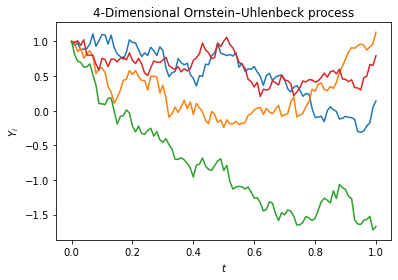

In [30]:
for i in range(4):
    plt.plot(x_axis, Y_4[:,i])

plt.title("4-Dimensional Ornstein–Uhlenbeck process")
plt.xlabel("$t$")
plt.ylabel("$Y_i$")
plt.show()

### Constructing the randomized signature

In [31]:
k_4 = 10
A_4 = np.random.normal(0, 1, size=(4, k, k))
b_4 = np.random.normal(0, 1, size=(4,k))
dY_4 = np.diff(Y_4, axis = 0)
Z_4 = np.zeros((N, k_4))
Z_4[0][0] = 1

In [32]:
dY_4.shape

(100, 4)

In [33]:
for i in range(N-1):
    for j in range(4):
        Z_4[i+1] = Z_4[i] + (A_4[j]@Z_4[i] + b_4[j])*dY_4[i][j]

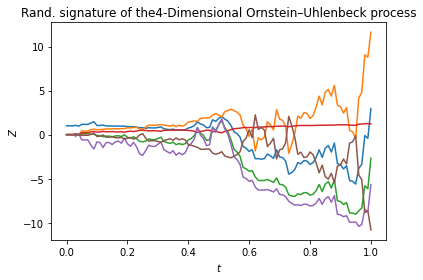

In [34]:
for i in range(6):
    plt.plot(x_axis, Z_4[:,i])

plt.title("Rand. signature of the4-Dimensional Ornstein–Uhlenbeck process")
plt.xlabel("$t$")
plt.ylabel("$Z$")
plt.show()